In [11]:
import numpy as np 
from scipy.special import erf
from scipy.stats import norm

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
x = np.arange(-5, 5, 0.1)

In [3]:
def Sigmoid(x):
    return (1 / (1 + np.exp(-x))) 

def ELU(x):
    y = np.copy(x)
    y[x <= 0] = np.exp(x[x <= 0]) - 1
    return y

def ReLU(x):
    return np.maximum(x, 0)

def CappedReLU(x, alpha=4):
    return np.minimum(np.maximum(x, 0), alpha)

def QuadReLU(x, alpha=4):
    return ((x + alpha) * CappedReLU((x + alpha), alpha=2*alpha)) / (4 * alpha)


def LeakyReLU(x, alpha=0.1):
    y = np.copy(x)
    y [ x <= 0] = alpha * (x[x <= 0])
    return y

def ApproxGELU(x):
    y = 0.5 * x *(1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))
    return y

def LeakyGELU(x, alpha=0.01):
    y = ApproxGELU(x)
    y[x < 0] = ApproxGELU(x[x < 0] / alpha)
    return y

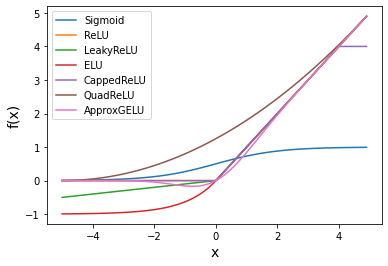

In [4]:
plt.plot(x, Sigmoid(x), label='Sigmoid')
plt.plot(x, ReLU(x), label='ReLU')
plt.plot(x, LeakyReLU(x), label='LeakyReLU')
plt.plot(x, ELU(x), label='ELU')
plt.plot(x, CappedReLU(x), label='CappedReLU')
plt.plot(x, QuadReLU(x, 5), label='QuadReLU')
plt.plot(x, ApproxGELU(x), label='ApproxGELU')
plt.legend()
plt.xlabel(r'x', fontsize=14)
plt.ylabel(r'f(x)', fontsize=14)
plt.savefig('acts.png', dpi=500)

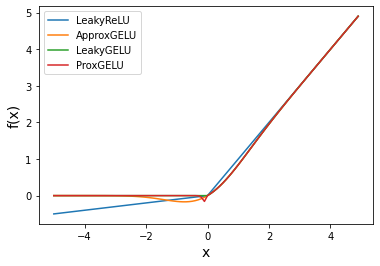

In [5]:
plt.plot(x, LeakyReLU(x), label='LeakyReLU')
plt.plot(x, ApproxGELU(x), label='ApproxGELU')
plt.plot(x, LeakyGELU(x), label='LeakyGELU')
plt.plot(x, LeakyGELU(LeakyReLU(x)), label='ProxGELU')
plt.legend()
plt.xlabel(r'x', fontsize=14)
plt.ylabel(r'f(x)', fontsize=14)
plt.savefig('gelu_solution.png', dpi=500)

Text(0, 0.5, 'f(x)')

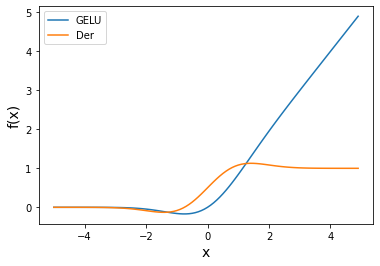

In [12]:
plt.plot(x, x * 0.5 * (1 + erf(x / np.sqrt(2))), label='GELU')
plt.plot(x, (0.5 * (1 + erf(x / np.sqrt(2))) + x * norm.pdf(x)), label='Der')
plt.legend()
plt.xlabel(r'x', fontsize=14)
plt.ylabel(r'f(x)', fontsize=14)

In [14]:
np.max(np.abs(0.5 * (1 + erf(x / np.sqrt(2))) + x * norm.pdf(x)))

1.1288617926562716